In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import balancing technique
from imblearn.over_sampling import SMOTE

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,


In [8]:
data = pd.read_csv('clean_encoded.csv')

In [9]:
#Target doesnt have to be numeric
data['Accident_Severity'] = data['Accident_Severity'].replace({1:'Slight', 2:'Serious', 3:'Fatal'})

In [10]:
data['Accident_Severity'].unique()

array(['Slight', 'Serious', 'Fatal'], dtype=object)

In [11]:
data.shape

(570383, 137)

In [12]:
features = data.columns.tolist()
features.remove('Accident_Severity')
len(features)

136

In [13]:
#predictor column here will be 'Accident_Severity'
#Assign our X and Ys
X=data[features]
y=data['Accident_Severity']

In [14]:
# Splitting X and y into training and testing datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [15]:
# Checking the distribution of classes to ensure it is same as y_test.

y_train.value_counts(normalize=True)

Slight     0.846204
Serious    0.142377
Fatal      0.011419
Name: Accident_Severity, dtype: float64

In [16]:
# Checking the distribution of classes to ensure it is same as y_train.

y_test.value_counts(normalize=True)

Slight     0.846202
Serious    0.142381
Fatal      0.011417
Name: Accident_Severity, dtype: float64

In [19]:
# Scaling X_train to the standard scale.
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)

# Transforming X_test to the same scale.
X_test_sc = ss.transform(X_test)


In [22]:
smote = SMOTE(random_state=42)
X_train_sc_smote, y_train_smote = smote.fit_resample(X_train_sc, y_train)

In [ ]:
# Instantiate second RandomForestClassifier with entropy and SMOTE
forest_2 = RandomForestClassifier(random_state=42, criterion='entropy', n_jobs=-1)

# train
forest_2.fit(X_train_sc_smote, y_train_smote)


In [32]:
# Actual Test Accuracy for RandomForestClassifier
test_acc1 = forest_2.score(X_test_sc, y_test)
test_acc1

0.8353460125108698

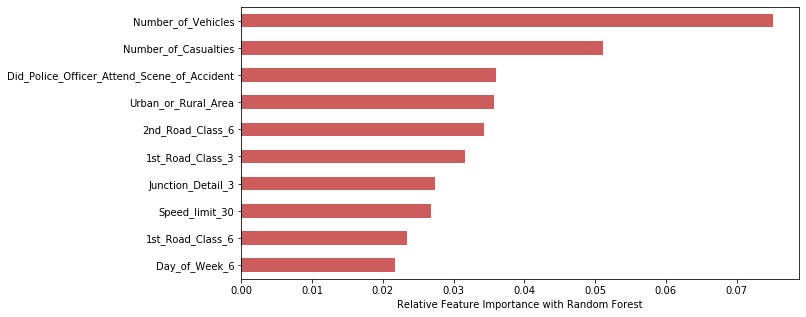

In [36]:
# plot the important features
feat_importances = pd.Series(forest_2.feature_importances_, index=features)
feat_importances.nlargest(10).sort_values().plot(kind='barh', color='indianred', figsize=(10,5))
plt.xlabel('Relative Feature Importance with Random Forest');
plt.savefig('./images/severity_predictors.png', bbox_inches='tight')